# もう一度特徴量と向き合う

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 前処理

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
middle = data["Name"].str.split(", ", expand=True)
middle = middle[1].str.split(".", expand=True)
data["Middle"] = middle[0]

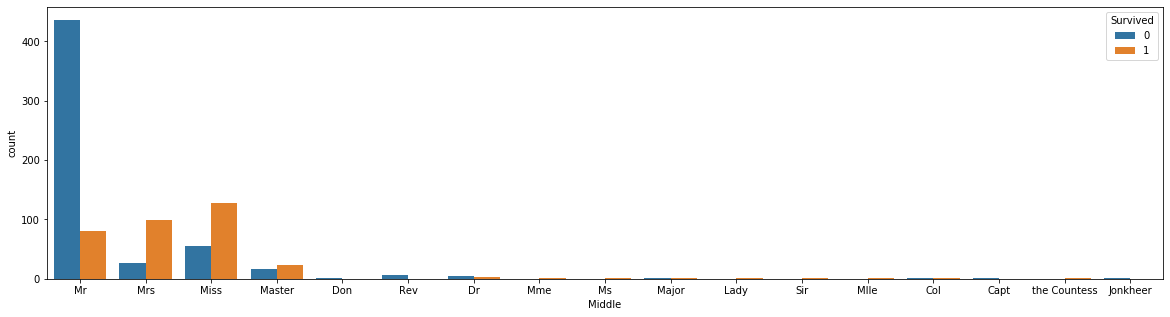

In [6]:
plt.figure(figsize=(20, 5))
sns.countplot(data["Middle"], hue=data["Survived"])

- Mr, Mrs, Miss, Master, Otherに分けてみる。
- それをSexの代わりに使ってみる

In [7]:
data.loc[(data["Middle"] != "Mr") 
         & (data["Middle"] != "Mrs") 
         & (data["Middle"] != "Miss") 
         & (data["Middle"] != "Master"), "Middle"] = "Other"

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Middle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


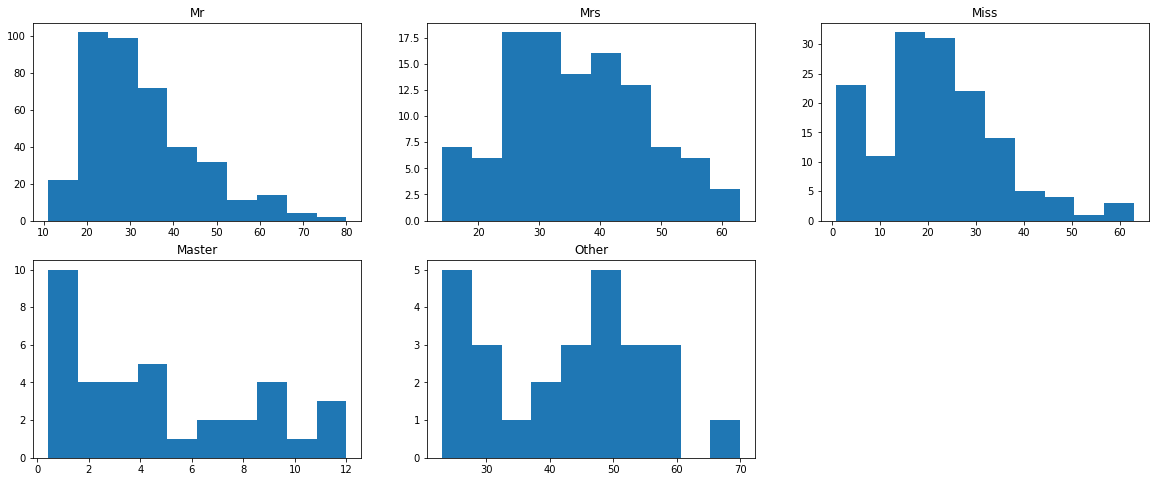

In [9]:
plt.figure(figsize=(20, 8))
i =1
for middle in ["Mr", "Mrs", "Miss", "Master", "Other"]:
    plt.subplot(2, 3, i)
    plt.hist(data.loc[data["Middle"] == middle, "Age"].dropna())
    plt.title(middle)
    i+=1
plt.show()

- Otherを2つに分ける

In [10]:
data.loc[(data["Middle"] == "Other") 
         & (data["Age"] < data.loc[data["Middle"] == "Other", "Age"].dropna().median()), "Middle"] = "Other_pre"
data.loc[(data["Middle"] == "Other"), "Middle"] = "Other_post"

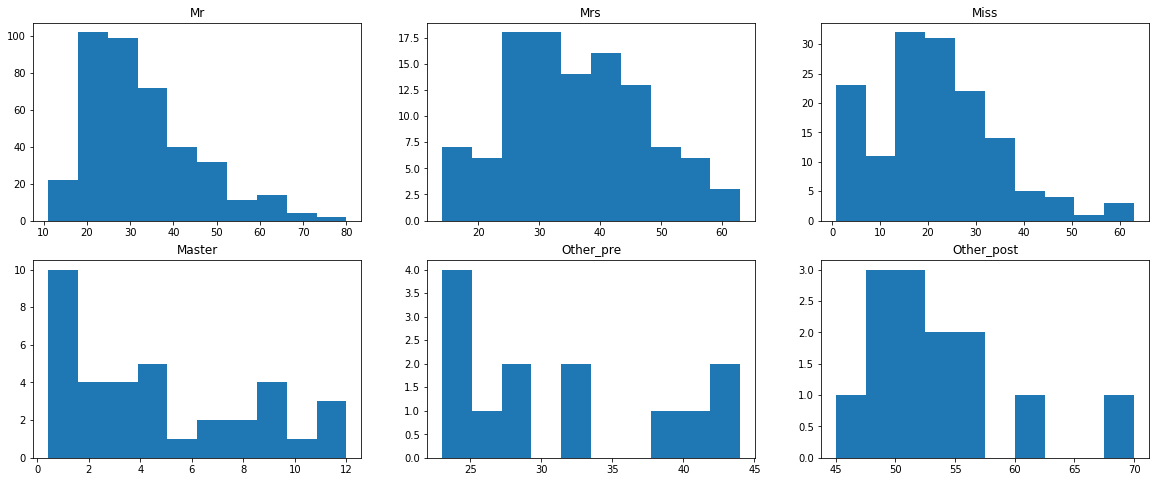

In [11]:
plt.figure(figsize=(20, 8))
i =1
for middle in ["Mr", "Mrs", "Miss", "Master", "Other_pre", "Other_post"]:
    plt.subplot(2, 3, i)
    plt.hist(data.loc[data["Middle"] == middle, "Age"].dropna())
    plt.title(middle)
    i+=1
plt.show()

In [12]:
for middle in ["Mr", "Mrs", "Miss", "Master", "Other_pre", "Other_post"]:
    data.loc[(data["Age"].isnull()) & (data["Middle"] == middle), "Age"] = data.loc[
        data["Middle"] == middle, "Age"].dropna().median()

### テストデータに対しても同じ操作を行う

In [13]:
middle = test["Name"].str.split(", ", expand=True)
middle = middle[1].str.split(".", expand=True)
test["Middle"] = middle[0]
test.loc[(test["Middle"] != "Mr") 
         & (test["Middle"] != "Mrs") 
         & (test["Middle"] != "Miss") 
         & (test["Middle"] != "Master"), "Middle"] = "Other"
test.loc[(test["Middle"] == "Other") 
         & (test["Age"] < test.loc[test["Middle"] == "Other", "Age"].dropna().median()), "Middle"] = "Other_pre"
test.loc[(test["Middle"] == "Other"), "Middle"] = "Other_post"
test.loc[test["Age"].isnull(), ["Middle", "Age"]]
for middle in ["Mr", "Mrs", "Miss", "Master", "Other_pre", "Other_post"]:
    test.loc[(test["Age"].isnull()) & (test["Middle"] == middle), "Age"] = test.loc[
        test["Middle"] == middle, "Age"].dropna().median()

### FareについてMiddleも用いて補完

In [17]:
test.loc[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Middle
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


(array([182.,  28.,  15.,   5.,   0.,   4.,   1.,   0.,   3.,   1.]),
 array([  0.    ,  26.2375,  52.475 ,  78.7125, 104.95  , 131.1875,
        157.425 , 183.6625, 209.9   , 236.1375, 262.375 ]),
 <a list of 10 Patch objects>)

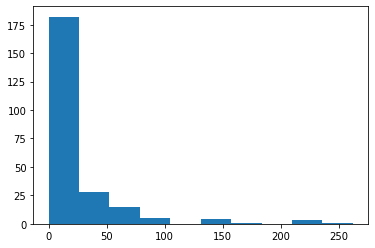

In [18]:
plt.hist(test.loc[test["Middle"] == "Mr", "Fare"].dropna())

In [20]:
test.loc[test["Middle"] == "Mr", "Fare"].dropna().median()

25.56330209205021

In [23]:
test["Fare"] = test["Fare"].fillna(test.loc[test["Middle"] == "Mr", "Fare"].dropna().median())

# X, yに分ける

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Middle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [30]:
X = data.drop(["PassengerId", "Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
y = data["Survived"]
X_test = test.drop(["PassengerId", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)

# ワンホットエンコーディング

- Pclass, Middle -> ワンホットエンコーディング

In [32]:
X = pd.get_dummies(X, columns=["Pclass"])
X = pd.get_dummies(X, columns=["Middle"])
X_test = pd.get_dummies(X_test, columns=["Pclass"])
X_test = pd.get_dummies(X_test, columns=["Middle"])

In [33]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Middle_Master,Middle_Miss,Middle_Mr,Middle_Mrs,Middle_Other_post,Middle_Other_pre
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0
1,38.0,1,0,71.2833,1,0,0,0,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0
3,35.0,1,0,53.1000,1,0,0,0,0,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0


### 4-fold cross validation, Grid Search

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# RandomForest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
def param():
  ret = {
      "n_estimators":[100,200, 300],
      "max_features": [3, 7, 10, 13],
      "min_samples_split": [2, 10, 20],
  }
  return ret
gscv = GridSearchCV(RandomForestClassifier(random_state=0), param(), cv=4)
gscv.fit(X, y)

print('Best score: {}'.format(gscv.best_score_))
print('Best parameters: {}'.format(gscv.best_params_))

Best score: 0.8361391694725028
Best parameters: {'max_features': 13, 'min_samples_split': 10, 'n_estimators': 200}


In [61]:
rf = RandomForestClassifier(max_features=13, min_samples_split=10, n_estimators=200)
scores = cross_val_score(rf, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.81696429 0.86547085 0.82432432 0.82432432]
Average score: 0.832770946595218


# LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
def param():
  ret = {
      'C':[0.001, 0.01, 0.1, 1, 10, 100],
  }
  return ret
gscv = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000), param(), cv=4)
gscv.fit(X, y)

print('Best score: {}'.format(gscv.best_score_))
print('Best parameters: {}'.format(gscv.best_params_))

Best score: 0.8181818181818182
Best parameters: {'C': 0.1}


In [46]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000, C=0.1)
scores = cross_val_score(lr, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.81696429 0.8206278  0.7972973  0.83783784]
Average score: 0.8181818058850009


# SVM

In [47]:
from sklearn.svm import SVC

In [50]:
def param():
  ret = {
      'C':[0.001, 0.01, 0.1, 1, 10, 100],
      'gamma':[0.001, 0.01, 0.1, 1, 10, 100]
  }
  return ret
gscv = GridSearchCV(SVC(), param(), cv=4)
gscv.fit(X, y)

print('Best score: {}'.format(gscv.best_score_))
print('Best parameters: {}'.format(gscv.best_params_))

Best score: 0.7867564534231201
Best parameters: {'C': 100, 'gamma': 0.001}


In [51]:
svm = SVC(C=100, gamma=0.001)
scores = cross_val_score(svm, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.77232143 0.80269058 0.76126126 0.81081081]
Average score: 0.7867710209007855


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
def param():
  ret = {
      "max_depth": [2,4,6,8,10],
      "max_features": ['log2', 'sqrt','auto'],
      "min_samples_split": [3, 5, 7, 9],
      "min_samples_leaf": [1,5,8],
      "criterion": ["gini", "entropy"],
  }
  return ret
gscv = GridSearchCV(DecisionTreeClassifier(random_state=0), param(), cv=4)
gscv.fit(X, y)

print('Best score: {}'.format(gscv.best_score_))
print('Best parameters: {}'.format(gscv.best_params_))

Best score: 0.8103254769921436
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [60]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=8, max_features="log2", min_samples_split=5)
scores = cross_val_score(dt, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.75892857 0.82959641 0.79279279 0.82882883]
Average score: 0.8025366514015617


# アンサンブル学習(Voting)

In [62]:
from sklearn.ensemble import VotingClassifier

In [64]:
max_score = 0
for w_lr in range(5):
    for w_svm in range(5):
        for w_dt in range(5):
            for w_rf in range(1, 6):
                vote_clf = VotingClassifier([('lr', lr), ('svm', svm), ('dt', dt), ('rf', rf)], weights=[w_lr, w_svm, w_dt, w_rf])
                scores = cross_val_score(vote_clf, X, y, cv=4)
                tmp_score = np.mean(scores)
                if max_score < tmp_score:
                    max_score = tmp_score
                    print("lr:svm:dt:rf = {}:{}:{}:{}".format(w_lr, w_svm, w_dt, w_rf))
                    print("tmp_score = {}".format(tmp_score))
                    print()
print("Test set score: {:.3f}".format(max_score))
print()

lr:svm:dt:rf = 0:0:0:1
tmp_score = 0.8338921130050615



KeyboardInterrupt: 

In [82]:
vote_clf =  VotingClassifier([('lr', lr), ('svm', svm), ('dt', dt), ('rf', rf)])
scores = cross_val_score(vote_clf, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.8125     0.86547085 0.8018018  0.83333333]
Average score: 0.8282764967882682


In [83]:
vote_clf.fit(X, y)
print()

# 提出用ファイルを作成

In [84]:
pred = vote_clf.predict(X_test)
submit = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":pred})
submit.to_csv("gender_submission.csv",index=False)

# 結果

- 77.99%

# 重要度をみてみる

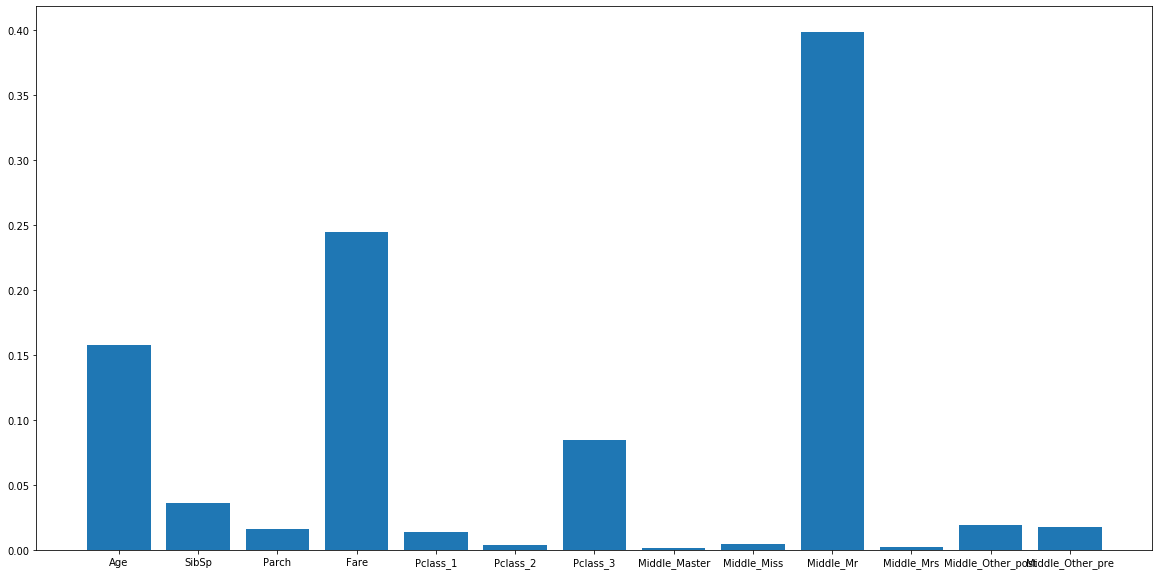

In [86]:
rf.fit(X, y)
feature = rf.feature_importances_
plt.figure(figsize=(20, 10))
plt.bar(range(len(feature)), feature, tick_label=X.columns)
plt.show()

- Sexを残して、「名前にMrがついてるかどうか」という特徴を追加しても良いかも?